## 零、載入套件

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, root_mean_squared_error
import matplotlib.pyplot as plt

plt.rc('font', family='Microsoft JhengHei')

## 一、匯入資料

In [2]:
df_realEstate = pd.read_csv('RealEstate.csv', encoding = 'big5')
pd.set_option('display.max_columns', None)
df_realEstate.head()

,租賃層次,總樓層數,建物總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,有無附傢俱,總額元,有無管理員,租賃期間,有無電梯,季別,車位,屋齡,低樓層,中樓層,高樓層,超高樓層,鄉鎮市區_三峽區,鄉鎮市區_三芝區,鄉鎮市區_三重區,鄉鎮市區_中和區,鄉鎮市區_中山區,鄉鎮市區_中正區,鄉鎮市區_五股區,鄉鎮市區_信義區,鄉鎮市區_內湖區,鄉鎮市區_八里區,鄉鎮市區_北投區,鄉鎮市區_南港區,鄉鎮市區_土城區,鄉鎮市區_士林區,鄉鎮市區_大同區,鄉鎮市區_大安區,鄉鎮市區_文山區,鄉鎮市區_新店區,鄉鎮市區_新莊區,鄉鎮市區_松山區,鄉鎮市區_板橋區,鄉鎮市區_林口區,鄉鎮市區_樹林區,鄉鎮市區_永和區,鄉鎮市區_汐止區,鄉鎮市區_泰山區,鄉鎮市區_淡水區,鄉鎮市區_深坑區,鄉鎮市區_瑞芳區,鄉鎮市區_石門區,鄉鎮市區_萬華區,鄉鎮市區_萬里區,鄉鎮市區_蘆洲區,鄉鎮市區_金山區,鄉鎮市區_雙溪區,鄉鎮市區_鶯歌區,縣市_台北市
0,6.0,7,121.70,2,2,2,1,1,1,59000.0,1,24,1,113S1,0,13.0,0,1,0,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,13.0,18,118.12,2,2,2,1,1,1,65000.0,1,24,1,113S1,0,14.0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,10.0,19,114.55,2,1,1,1,1,1,75000.0,1,12,1,113S1,0,4.0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,14.0,18,92.48,2,1,1,1,1,1,65000.0,1,12,1,113S1,0,14.0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,6.0,7,99.73,2,1,1,1,1,1,42000.0,1,24,1,113S1,0,15.0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [3]:
df_realEstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36484 entries, 0 to 36483
Data columns (total 57 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   租賃層次       36484 non-null  float64
 1   總樓層數       36484 non-null  int64  
 2   建物總面積平方公尺  36484 non-null  float64
 3   建物現況格局-房   36484 non-null  int64  
 4   建物現況格局-廳   36484 non-null  int64  
 5   建物現況格局-衛   36484 non-null  int64  
 6   建物現況格局-隔間  36484 non-null  int64  
 7   有無管理組織     36484 non-null  int64  
 8   有無附傢俱      36484 non-null  int64  
 9   總額元        36484 non-null  float64
 10  有無管理員      36484 non-null  int64  
 11  租賃期間       36484 non-null  int64  
 12  有無電梯       36484 non-null  int64  
 13  季別         36484 non-null  object 
 14  車位         36484 non-null  int64  
 15  屋齡         36484 non-null  float64
 16  低樓層        36484 non-null  int64  
 17  中樓層        36484 non-null  int64  
 18  高樓層        36484 non-null  int64  
 19  超高樓層       36484 non-null  int64  
 20  鄉鎮市區_三

## 二、資料處理

In [4]:
X_train, X_test = train_test_split(df_realEstate, test_size=0.2, stratify=df_realEstate['季別'], random_state=42)
X_train, y_train = X_train.drop(['季別', '總額元', '租賃層次'], axis=1), X_train['總額元']
X_test, y_test = X_test.drop(['季別', '總額元', '租賃層次'], axis=1), X_test['總額元']

# 正規化和標準化(可不用)
cols_nor = ['總樓層數', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛']
cols_std = ['建物總面積平方公尺', '租賃期間', '屋齡']

nor_scaler = MinMaxScaler()
std_scaler = StandardScaler()
X_train[cols_nor] = nor_scaler.fit_transform(X_train[cols_nor])
X_test[cols_nor] = nor_scaler.transform(X_test[cols_nor])
X_train[cols_std] = std_scaler.fit_transform(X_train[cols_std])
X_test[cols_std] = std_scaler.transform(X_test[cols_std])


## 三、建立模型：隨機森林

### 1. 參數調整

In [5]:
# 隨機搜尋
model = RandomForestRegressor(bootstrap=True, random_state=42)

param_dist = {
    'n_estimators': np.arange(100, 1100, 100),
    'min_samples_split': np.arange(2, 31, 1),
    'min_samples_leaf':np.arange(1, 31, 1),
    'max_depth': np.arange(2, 31, 1),
}

random_search = RandomizedSearchCV(model, param_dist, n_iter=30, cv=5)
random_search.fit(X_train, y_train)

print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation R2: {round(random_search.best_score_, 4)}")

Best parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20}
Best cross-validation R2: 0.7967


In [6]:
results = zip(random_search.cv_results_.get('params'), random_search.cv_results_.get('mean_test_score'))
sorted_results = sorted(results, key=lambda x: (x[0]['n_estimators'], x[0]['min_samples_split'], x[0]['min_samples_leaf'], x[0]['max_depth'])) # 將結果按 'n_estimators', 'min_samples_split', 'min_samples_leaf', 'max_depth' 排序

for i, j in sorted_results:
    print(f'{i}: {round(j, 4)}')

{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20}: 0.7967
{'n_estimators': 100, 'min_samples_split': 16, 'min_samples_leaf': 16, 'max_depth': 4}: 0.606
{'n_estimators': 100, 'min_samples_split': 27, 'min_samples_leaf': 28, 'max_depth': 22}: 0.7432
{'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 17, 'max_depth': 20}: 0.7613
{'n_estimators': 200, 'min_samples_split': 19, 'min_samples_leaf': 20, 'max_depth': 18}: 0.7554
{'n_estimators': 200, 'min_samples_split': 21, 'min_samples_leaf': 19, 'max_depth': 28}: 0.7582
{'n_estimators': 200, 'min_samples_split': 26, 'min_samples_leaf': 10, 'max_depth': 8}: 0.7333
{'n_estimators': 200, 'min_samples_split': 26, 'min_samples_leaf': 17, 'max_depth': 13}: 0.7556
{'n_estimators': 200, 'min_samples_split': 28, 'min_samples_leaf': 29, 'max_depth': 29}: 0.7421
{'n_estimators': 200, 'min_samples_split': 30, 'min_samples_leaf': 22, 'max_depth': 24}: 0.7526
{'n_estimators': 200, 'min_samples_split': 30

- n_estimators (樹的數量)：過大會增加運算時間，且隨著數量變大並 R2 沒有遞增的趨勢。
- min_samples_split (節點再分裂的最小樣本數)：較小的值讓樹更容易分裂，可能過擬合；較大值則使樹較淺，可能欠擬合。隨著數量變大 R2 有遞減的趨勢。
- min_samples_leaf (葉節點的最小樣本數)：太小可能過擬合，隨著數量變大 R2 有遞減的趨勢。
- max_depth (樹的最大深度)：深度越大，樹越複雜，可能過擬合；深度太小，則可能欠擬合。隨著數量變大 R2 有遞增的趨勢。

In [7]:
# 網格搜尋
param_grid = {
    'n_estimators': [300, 500],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf':[2, 5, 8],
    'max_depth': [20, 25, 30],
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation R2: {grid_search.best_score_}")


Best parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Best cross-validation R2: 0.80144295274864


In [8]:
results_grid = zip(grid_search.cv_results_.get('params'), grid_search.cv_results_.get('mean_test_score'))

for i, j in results_grid:
    print(f'{i}: {round(j, 4)}')

{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}: 0.7994
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}: 0.7995
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}: 0.7993
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}: 0.7994
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 300}: 0.7983
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 500}: 0.7985
{'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 300}: 0.7907
{'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 500}: 0.7906
{'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 300}: 0.7907
{'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 500}: 0.7906
{'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split'

### 2. 測試結果

In [9]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print('R2:', round(r2, 4))
print('RMSE:', round(rmse, 2))

R2: 0.7841
RMSE: 4990.2


### 3. 結果顯示

In [10]:
# 特徵重要性
feature_importance = pd.Series(best_model.feature_importances_, index=X_train.columns)
important_features = feature_importance.sort_values(ascending=False)
print(important_features)

建物總面積平方公尺    0.338595
縣市_台北市       0.206419
屋齡           0.113874
有無電梯         0.083340
總樓層數         0.042983
鄉鎮市區_淡水區     0.028499
租賃期間         0.023899
建物現況格局-房     0.016889
建物現況格局-衛     0.014993
建物現況格局-廳     0.011432
有無附傢俱        0.007511
鄉鎮市區_三芝區     0.007248
鄉鎮市區_中山區     0.006894
鄉鎮市區_文山區     0.006880
鄉鎮市區_大安區     0.006703
車位           0.005555
鄉鎮市區_萬華區     0.005187
鄉鎮市區_士林區     0.004982
鄉鎮市區_三重區     0.004509
鄉鎮市區_五股區     0.003490
鄉鎮市區_板橋區     0.003443
鄉鎮市區_八里區     0.003408
鄉鎮市區_鶯歌區     0.003343
鄉鎮市區_北投區     0.003313
鄉鎮市區_大同區     0.003294
鄉鎮市區_中和區     0.003168
低樓層          0.003004
中樓層          0.002944
鄉鎮市區_信義區     0.002770
鄉鎮市區_松山區     0.002722
鄉鎮市區_三峽區     0.002701
鄉鎮市區_中正區     0.002365
有無管理員        0.002328
高樓層          0.002318
鄉鎮市區_內湖區     0.002180
鄉鎮市區_永和區     0.002016
鄉鎮市區_南港區     0.001618
有無管理組織       0.001554
鄉鎮市區_新莊區     0.001402
鄉鎮市區_新店區     0.001386
鄉鎮市區_汐止區     0.001106
鄉鎮市區_萬里區     0.001102
超高樓層         0.001086
鄉鎮市區_瑞芳區     0.001002
鄉鎮市區_樹林區     0.000972
鄉鎮市區_蘆洲區  

In [11]:
# 新資料（住在 5 層 4 坪 50 年公寓含 1 房 1 衛附傢俱租 1 年）
new_data = pd.DataFrame([
    dict(zip(df_realEstate.columns, [5, 5, 3.30579*4, 1, 0, 1, 0, 0, 1, 0, 0, 12, 0, '114S2', 0, 50, 1, 0, 0, 0,
                                     0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])), # 三重
    dict(zip(df_realEstate.columns, [5, 5, 3.30579*4, 1, 0, 1, 0, 0, 1, 0, 0, 12, 0, '114S2', 0, 50, 1, 0, 0, 0,
                                     0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])), # 中和
    dict(zip(df_realEstate.columns, [5, 5, 3.30579*4, 1, 0, 1, 0, 0, 1, 0, 0, 12, 0, '114S2', 0, 50, 1, 0, 0, 0,
                                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])), # 永和                                                       
    dict(zip(df_realEstate.columns, [5, 5, 3.30579*4, 1, 0, 1, 0, 0, 1, 0, 0, 12, 0, '114S2', 0, 50, 1, 0, 0, 0,
                                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])), # 板橋   
    dict(zip(df_realEstate.columns, [5, 5, 3.30579*4, 1, 0, 1, 0, 0, 1, 0, 0, 12, 0, '114S2', 0, 50, 1, 0, 0, 0,
                                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])), # 南港             
    dict(zip(df_realEstate.columns, [5, 5, 3.30579*4, 1, 0, 1, 0, 0, 1, 0, 0, 12, 0, '114S2', 0, 50, 1, 0, 0, 0,
                                     0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])), # 信義                                                                                                                         
])
new_data = new_data.drop(['季別', '總額元', '租賃層次'], axis=1)
new_data[cols_nor] = nor_scaler.transform(new_data[cols_nor])
new_data[cols_std] = std_scaler.transform(new_data[cols_std])
new_data

,總樓層數,建物總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,有無附傢俱,有無管理員,租賃期間,有無電梯,車位,屋齡,低樓層,中樓層,高樓層,超高樓層,鄉鎮市區_三峽區,鄉鎮市區_三芝區,鄉鎮市區_三重區,鄉鎮市區_中和區,鄉鎮市區_中山區,鄉鎮市區_中正區,鄉鎮市區_五股區,鄉鎮市區_信義區,鄉鎮市區_內湖區,鄉鎮市區_八里區,鄉鎮市區_北投區,鄉鎮市區_南港區,鄉鎮市區_土城區,鄉鎮市區_士林區,鄉鎮市區_大同區,鄉鎮市區_大安區,鄉鎮市區_文山區,鄉鎮市區_新店區,鄉鎮市區_新莊區,鄉鎮市區_松山區,鄉鎮市區_板橋區,鄉鎮市區_林口區,鄉鎮市區_樹林區,鄉鎮市區_永和區,鄉鎮市區_汐止區,鄉鎮市區_泰山區,鄉鎮市區_淡水區,鄉鎮市區_深坑區,鄉鎮市區_瑞芳區,鄉鎮市區_石門區,鄉鎮市區_萬華區,鄉鎮市區_萬里區,鄉鎮市區_蘆洲區,鄉鎮市區_金山區,鄉鎮市區_雙溪區,鄉鎮市區_鶯歌區,縣市_台北市
0,0.095238,-1.644602,0.008065,0.0,0.011364,0,0,1,0,-0.309383,0,0,1.275598,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.095238,-1.644602,0.008065,0.0,0.011364,0,0,1,0,-0.309383,0,0,1.275598,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.095238,-1.644602,0.008065,0.0,0.011364,0,0,1,0,-0.309383,0,0,1.275598,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.095238,-1.644602,0.008065,0.0,0.011364,0,0,1,0,-0.309383,0,0,1.275598,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.095238,-1.644602,0.008065,0.0,0.011364,0,0,1,0,-0.309383,0,0,1.275598,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0.095238,-1.644602,0.008065,0.0,0.011364,0,0,1,0,-0.309383,0,0,1.275598,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [12]:
# 計算預測區間
z_score = 1.96
new_pred = best_model.predict(new_data)
residuals = y_test - y_pred
sigma = np.std(residuals)
se_pred = sigma * np.sqrt(1 + 1/len(y_test))

region = ['三重', '中和', '永和', '板橋', '南港', '信義']
print(f'預測值 95% 預測區間 (SE = {round(se_pred, 2)})')
for i in range(6):
    print(f'{region[i]}：[{round(new_pred[i]-se_pred*z_score, 2)}, {round(new_pred[i]+se_pred*z_score, 2)}], 預測值： {round(new_pred[i], 2)}')


預測值 95% 預測區間 (SE = 4989.63)
三重：[-984.46, 18574.89], 預測值： 8795.22
中和：[-1712.94, 17846.42], 預測值： 8066.74
永和：[-1692.1, 17867.25], 預測值： 8087.58
板橋：[-1725.56, 17833.8], 預測值： 8054.12
南港：[-1440.94, 18118.41], 預測值： 8338.74
信義：[-838.89, 18720.46], 預測值： 8940.78


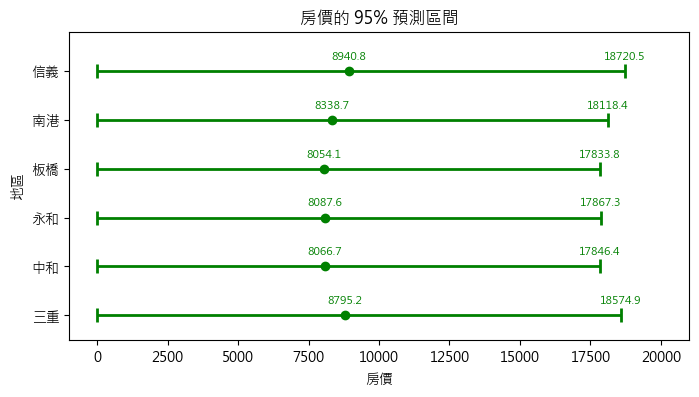

In [13]:
lower = 0
upper = new_pred + se_pred * z_score
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.errorbar(new_pred, region, xerr=[new_pred - lower, upper - new_pred], fmt='o', capsize=5, capthick=2, elinewidth=2, label="預測值 (含信賴區間)", color="green")
ax.set_xlabel("房價")
ax.set_ylabel("地區")
ax.set_xlim(-1000,21000)
ax.set_ylim(-0.5,5.8)
ax.set_title("房價的 95% 預測區間")
y_indices = np.arange(len(region)) 
for i in range(len(new_pred)):
    plt.text(new_pred[i], y_indices[i] + 0.3, f"{new_pred[i]:.1f}", ha='center', va='center', fontsize=8, color="green")  # 預測值
    #plt.text(lower, y_indices[i] + 0.3, f"{lower}", ha='center', va='center', fontsize=8, color="green")                  # 下界
    plt.text(upper[i], y_indices[i] + 0.3, f"{upper[i]:.1f}", ha='center', va='center', fontsize=8, color="green")        # 上界

plt.show()